In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [164]:
data = pd.concat([pd.read_csv('../data/%d.csv' % year) for year in range(2003,2017)])

In [165]:
data = data[data.Year!=2003]

In [168]:
to_remove = set(tuple(tup) for tup in data[data['Strokes_Gained/Baseline']==0][['Year','Course_#','Round','Hole','Player_#']].values.tolist())

In [169]:
len(to_remove)

164781

In [170]:
len(data)

13037647

In [172]:
data = data.iloc[[u for u,tup in enumerate(data[['Year','Course_#','Round','Hole','Player_#']].values.tolist()) if tuple(tup) not in to_remove]]

In [173]:
len(data)

12356513

In [129]:
data.columns

Index([u'#_of_Strokes', u'1st_Putt_Flag', u'Around_the_Green_Flag', u'Cat',
       u'Course_#', u'Course_Name', u'Difficulty_Start', u'Distance',
       u'Distance_from_hole', u'Distance_to_Hole_after_the_Shot',
       u'Distance_to_Pin', u'Elevation', u'From_Location(Enhanced)',
       u'From_Location(Scorer)', u'Green_to_work_with', u'Hole', u'Hole_Score',
       u'Left/Right', u'Par_Value', u'Permanent_Tournament_#', u'Player_#',
       u'Player_First_Name', u'Player_Last_Name', u'Recovery_Shot', u'Round',
       u'Shot', u'Shot_Type(S/P/D)', u'Shots_taken_from_location',
       u'Started_at_X', u'Started_at_Y', u'Started_at_Z', u'Strokes_Gained',
       u'Strokes_Gained/Baseline', u'Strokes_Gained_Category', u'Time',
       u'To_Location(Enhanced)', u'To_Location(Laser)', u'To_Location(Scorer)',
       u'Tourn.#', u'Tournament_Name', u'Went_to_X', u'Went_to_Y',
       u'Went_to_Z', u'Yardage', u'Year'],
      dtype='object')

In [131]:
data.Strokes_Gained.describe()

count    1.303765e+07
mean    -7.783164e-15
std      3.122689e-01
min     -2.130540e+00
25%     -1.572124e-01
50%      2.614975e-03
75%      1.338997e-01
max      2.812367e+00
Name: Strokes_Gained, dtype: float64

In [67]:
data.Difficulty_Start.describe()

count    13037647.000000
mean            2.536867
std             1.125554
min             0.987553
25%             1.546205
50%             2.575574
75%             3.362644
max             5.515152
Name: Difficulty_Start, dtype: float64

In [68]:
(data.Difficulty_Start<1).sum()

113668

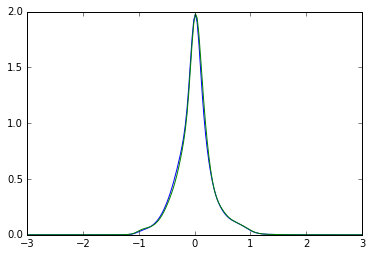

In [133]:
from scipy.stats import gaussian_kde

density = gaussian_kde(data.Strokes_Gained.values)
xs = np.linspace(-3,3,200)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))

density = gaussian_kde(data['Strokes_Gained/Baseline'].values)
density.covariance_factor = lambda : .25
density._compute_covariance()
plt.plot(xs,density(xs))

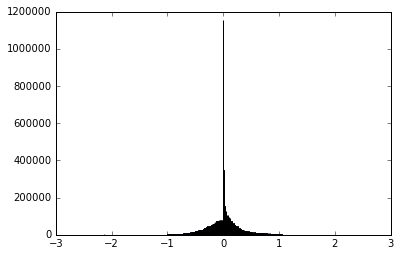

In [137]:
plt.hist(data.Strokes_Gained.values,bins=1000);

In [14]:
data.head()

,Cat,Shots_taken_from_location,Started_at_Z,Distance_from_hole,Hole,Round,Course_#,Year,Green_to_work_with,Year-Course,Hole-Course,Round-Year-Course,Difficulty
1052894,Tee Box,10,NaN,1383.498403,8,2,660,2004,58.801544,2004-660,8-660,2-2004-660,0
1052895,Tee Box,4,NaN,1367.723048,15,1,500,2004,17.232815,2004-500,15-500,1-2004-500,0
1052896,Tee Box,4,NaN,1606.076119,13,4,538,2004,13.637763,2004-538,13-538,4-2004-538,0
1052897,Tee Box,4,NaN,1345.218848,13,1,500,2004,50.857550,2004-500,13-500,1-2004-500,0
1052898,Tee Box,4,NaN,1217.408893,12,1,500,2004,20.491049,2004-500,12-500,1-2004-500,0


In [14]:
data[(data.Shot!=1) & (data.Cat!='Green')].shape

(4295702, 44)

In [174]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start)**2)**.5

0.49650290060787877

In [179]:
data.insert(len(data.columns),'Difficulty_Start_adam',[0]*len(data))
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_adam'] = data[data.Shot==data.Hole_Score].Strokes_Gained + 1
data=data.sort_values(['Year','Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_adam'] = \
                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_adam.values +\
                                data[(data.Hole_Score==i) & (data.Shot==j)].Strokes_Gained.values + 1

In [180]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_adam)**2)**.5

0.49650290060787877

In [175]:
#data = data.drop('Difficulty_Start_broadie',axis=1)
data.insert(len(data.columns),'Difficulty_Start_broadie',[0]*len(data))

In [176]:
data.loc[data.Shot==data.Hole_Score,'Difficulty_Start_broadie'] = data[data.Shot==data.Hole_Score]['Strokes_Gained/Baseline'] + 1

In [177]:
data=data.sort_values(['Year','Player_#','Course_#','Round','Hole'])
for i in range(1,int(data.Hole_Score.max())+1): ##i is hole_score
    for j in range(i-1,0,-1): ##j is shot
        data.loc[(data.Hole_Score==i) & (data.Shot==j),'Difficulty_Start_broadie'] = \
                                data[(data.Hole_Score==i) & (data.Shot==j+1)].Difficulty_Start_broadie.values +\
                                data[(data.Hole_Score==i) & (data.Shot==j)]['Strokes_Gained/Baseline'].values + 1

In [ ]:
data.Difficulty_Start_broadie.describe()

In [156]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [158]:
(data['Strokes_Gained/Baseline']==0).sum()

226723

In [157]:
data[data.Difficulty_Start_broadie>5][['Cat','Distance_from_hole','Shots_taken_from_location','Difficulty_Start_broadie','Difficulty_Start_adam']]

,Cat,Distance_from_hole,Shots_taken_from_location,Difficulty_Start_broadie,Difficulty_Start_adam
11495,Tee Box,2001.398694,5,5.016,4.816176
11700,Tee Box,1993.411157,5,5.014,4.638889
18150,Tee Box,2001.398694,4,5.016,4.816176
18345,Tee Box,1993.411157,5,5.014,4.638889
20651,Tee Box,1493.460765,6,6.000,4.852941
20668,Tee Box,1391.324825,6,6.000,4.184615
20752,Tee Box,1754.759425,7,7.000,5.014493
20753,Fairway,1093.751596,6,6.000,3.963835
22348,Tee Box,1941.507306,6,6.000,4.819444
22374,Tee Box,1357.736402,6,6.000,4.312500


In [178]:
np.mean((data.Shots_taken_from_location-data.Difficulty_Start_broadie)**2)**.5

0.5024583995993779

Seeing if adding average of all data for tee difficulties in raw data helps.

In [70]:
data.insert(len(data.columns),'New_Difficulty',data.Difficulty_Start)

In [43]:
import pickle
with open('./../PickleFiles/TeeDifficulty.pkl','r') as pickleFile:
    d = pickle.load(pickleFile)

In [71]:
years = [key[0] for key in d.keys()]
courses = [key[1] for key in d.keys()]
holes = [key[2] for key in d.keys()]
round = [key[3] for key in d.keys()]
difficulties = [d[key] for key in d.keys()]
df = pd.DataFrame({'Year':years,'Course_#':courses,'Hole':holes,'Round':round,'Tee_Difficulty':difficulties})

In [72]:
df.shape

(45702, 5)

In [73]:
df.head()

,Course_#,Hole,Round,Tee_Difficulty,Year
0,202,6,2,4.562500,2004
1,205,15,1,2.846154,2014
2,656,11,1,3.294118,2007
3,776,16,4,3.986301,2014
4,4,16,4,3.240506,2011


In [74]:
data = pd.merge(data, df, on=['Course_#','Hole','Round','Year'])

In [75]:
data.loc[data.Shot==1,'New_Difficulty'] = data.loc[data.Shot==1,'Tee_Difficulty']

In [76]:
np.mean((data.Shots_taken_from_location-data.New_Difficulty)**2)**.5

0.4960342137603995

In [77]:
data.New_Difficulty.describe()

count    13037647.000000
mean            2.545726
std             1.137536
min             0.987553
25%             1.546205
50%             2.575574
75%             3.370118
max             5.518519
Name: New_Difficulty, dtype: float64